In [124]:
import pandas as pd
import numpy as np
from functools import reduce
# Load the dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/thepycoach/data_preprocessing/main/datasets/StudentsPerformance.csv")
dataframe = pd.DataFrame(dataset)

In [126]:
# reading and understanding data
# print(dataframe.head())
# print(dataframe)
print(dataframe.tail())

     gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  


In [37]:
# checking missing values
check_missing_data = dataframe.isnull()
# print(check_missing_data.head())

# handeling missing data 
# drop tables
filled_data = dataframe.dropna()
filled_data

dataframe['gender'] = dataframe['gender'].fillna(dataframe['gender'].mode()[0])
dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [128]:
dataframe.isnull().sum().sort_values(ascending=True)
# dataframe

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [52]:
femaleCount = dataframe['gender'].value_counts("female")
femaleCount

gender
female    0.518
male      0.482
Name: proportion, dtype: float64

In [72]:
# take female count
female_count = [item for item in dataframe['gender'] if item=="female"]
print("Female:", len(female_count))

male_count = [item for item in dataframe['gender'] if item=="male"]
print("Male:",len(male_count))



Female: 518
Male: 482


In [79]:
index_female = [x for x in range(len(dataframe['gender'])) if dataframe['gender'][x] == 'female']
index_female

index_male = [x for x in range(len(dataframe['gender'])) if dataframe['gender'][x] == 'male']
index_male
len(index_male)

482

In [138]:
# get array of scores of male and female
mathScoreFemale = [dataframe["math score"][i] for i in index_female]
mathScoreMale = [dataframe["math score"][i] for i in index_male]

readingScoreFemale = [dataframe["reading score"][i] for i in index_female]
readingScoreMale = [dataframe["reading score"][i] for i in index_male]

writingScoreFemale = [dataframe["writing score"][i] for i in index_female]
writingScoreMale = [dataframe["writing score"][i] for i in index_male]

# print(mathScoreFemale, mathScoreMale)
len(mathScoreFemale)
len(mathScoreMale)
# mathScoreMale

482

In [120]:
# find out the average female, male math score,  reading score,  writing score  
averageOfMathFemale = sum(mathScoreFemale) / len(mathScoreFemale)
averageOfMathMale = sum(mathScoreMale) / len(mathScoreMale)

averageOfReadingFemale = sum(readingScoreFemale) / len(mathScoreFemale)
averageOfReadingMale = sum(readingScoreMale) / len(mathScoreMale)

averageOfWritingFemale = sum(writingScoreFemale) / len(mathScoreFemale)
averageOfWritingMale = sum(writingScoreMale) / len(mathScoreMale)
print(averageOfMathFemale)
print(averageOfMathMale)
print(averageOfReadingFemale)
print(averageOfReadingMale)
print(averageOfWritingFemale)
print(averageOfWritingMale)


63.633204633204635
68.72821576763485
72.60810810810811
65.47302904564316
72.46718146718146
63.31120331950208


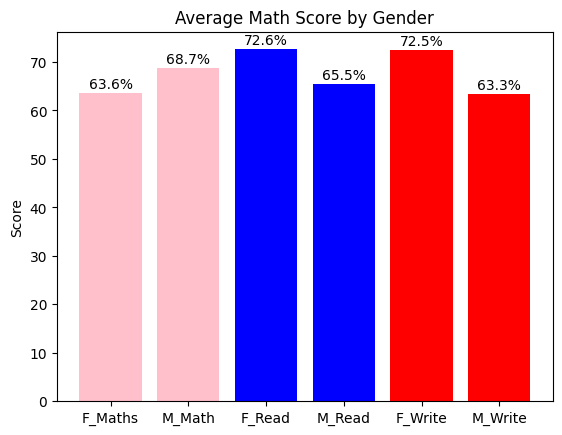

In [134]:
import matplotlib.pyplot as plt

avg_percentages = [averageOfMathFemale, averageOfMathMale, averageOfReadingFemale, averageOfReadingMale,averageOfWritingFemale,averageOfWritingMale]
labels = ['F_Maths', 'M_Math', "F_Read","M_Read","F_Write","M_Write"]
values = [averageOfMathFemale, averageOfMathMale, averageOfReadingFemale, averageOfReadingMale,averageOfWritingFemale, averageOfWritingMale ]

# # add text on top of bars
# for i in range(len(values)):
#     plt.text(i, values[i] + 1, f'{labels[i]}', ha='center')

# show % on top of bars
for i in range(len(values)):
    plt.text(i, values[i] + 1, f'{avg_percentages[i]:.1f}%', ha='center')
    
plt.bar(labels, values, color=['pink', 'pink', 'blue','blue','red','red'])
plt.title('Average Math Score by Gender')
plt.ylabel('Score')
plt.show()


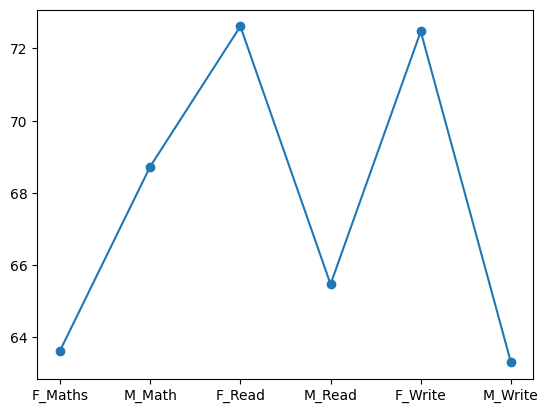

In [141]:
plt.plot(labels, values)
plt.scatter(labels, values)


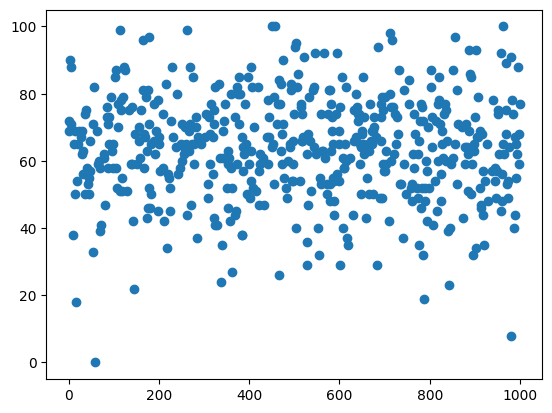

In [147]:
plt.scatter(index_female, mathScoreFemale)